In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import open_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['ambilobe', 'dikson', 'cape town', 'salalah', 'port keats', 'berlevag', 'carlisle', 'illoqqortoormiut', 'khatanga', 'mataura', 'rikitea', 'tommot', 'viligili', 'ushuaia', 'homer', 'bandarbeyla', 'nettuno', 'mogadishu', 'kavieng', 'east london', 'albany', 'naftah', 'tuktoyaktuk', 'yellowknife', 'ust-kulom', 'saint-philippe', 'upernavik', 'komsomolskiy', 'vaini', 'doha', 'barentsburg', 'butaritari', 'hobart', 'namibe', 'kamenskoye', 'requena', 'busselton', 'agva', 'klaksvik', 'narsaq', 'borogontsy', 'grand island', 'severo-kurilsk', 'shubarkuduk', 'saulkrasti', 'thompson', 'zuwarah', 'atuona', 'bambous virieux', 'sterling', 'amambai', 'xuanhua', 'kerman', 'vestmanna', 'ardmore', 'sitka', 'bilma', 'bredasdorp', 'alta floresta', 'presidencia roque saenz pena', 'kapaa', 'punta arenas', 'carnarvon', 'puerto ayora', 'nizhneyansk', 'izumo', 'amderma', 'kathu', 'bluff', 'lavrentiya', 'tsihombe', 'araouane', 'qaanaaq', 'kaitangata', 'hithadhoo', 'vila franca do campo', 'okha', 'saint george', '

In [3]:
weather_df = pd.DataFrame()
request_num = 0
for city in cities:
    try:
        request_num += 1
        params = {"appid": open_key,"q":city, "units": "imperial"}
        url = 'http://api.openweathermap.org/data/2.5/weather?'
        response = requests.get(url, params=params).json()
        city_df = pd.json_normalize(response)
        weather_df = weather_df.append(city_df, ignore_index=True)
        print(f'Getting response for {city}, request number {request_num}')
    except:
        print(f"Hmm, can't find {city}, request number {request_num}")
        pass


Getting response for ambilobe, request number 1
Getting response for dikson, request number 2
Getting response for cape town, request number 3
Getting response for salalah, request number 4
Getting response for port keats, request number 5
Getting response for berlevag, request number 6
Getting response for carlisle, request number 7
Getting response for illoqqortoormiut, request number 8
Getting response for khatanga, request number 9
Getting response for mataura, request number 10
Getting response for rikitea, request number 11
Getting response for tommot, request number 12
Getting response for viligili, request number 13
Getting response for ushuaia, request number 14
Getting response for homer, request number 15
Getting response for bandarbeyla, request number 16
Getting response for nettuno, request number 17
Getting response for mogadishu, request number 18
Getting response for kavieng, request number 19
Getting response for east london, request number 20
Getting response for alb

Getting response for leningradskiy, request number 166
Getting response for san cristobal, request number 167
Getting response for camacha, request number 168
Getting response for pudozh, request number 169
Getting response for norman wells, request number 170
Getting response for wyszkow, request number 171
Getting response for lima, request number 172
Getting response for nabire, request number 173
Getting response for codrington, request number 174
Getting response for ponta do sol, request number 175
Getting response for yuanping, request number 176
Getting response for juegang, request number 177
Getting response for port-gentil, request number 178
Getting response for ust-kuyga, request number 179
Getting response for atar, request number 180
Getting response for kuche, request number 181
Getting response for palabuhanratu, request number 182
Getting response for chinsali, request number 183
Getting response for kampot, request number 184
Getting response for cidreira, request nu

Getting response for zabaykalsk, request number 329
Getting response for hambantota, request number 330
Getting response for bykovo, request number 331
Getting response for umm lajj, request number 332
Getting response for kemi, request number 333
Getting response for saldanha, request number 334
Getting response for sao gabriel da cachoeira, request number 335
Getting response for bethel, request number 336
Getting response for guerrero negro, request number 337
Getting response for san vicente de canete, request number 338
Getting response for sturgeon bay, request number 339
Getting response for karaul, request number 340
Getting response for sibolga, request number 341
Getting response for rungata, request number 342
Getting response for kailua, request number 343
Getting response for libreville, request number 344
Getting response for faya, request number 345
Getting response for pangnirtung, request number 346
Getting response for villa bruzual, request number 347
Getting respons

Getting response for debre tabor, request number 493
Getting response for dwarka, request number 494
Getting response for mago, request number 495
Getting response for shieli, request number 496
Getting response for zykovo, request number 497
Getting response for necochea, request number 498
Getting response for flinders, request number 499
Getting response for tura, request number 500
Getting response for liuhe, request number 501
Getting response for aklavik, request number 502
Getting response for tucuman, request number 503
Getting response for los llanos de aridane, request number 504
Getting response for karasjok, request number 505
Getting response for dzhusaly, request number 506
Getting response for solovetskiy, request number 507
Getting response for lithgow, request number 508
Getting response for nhulunbuy, request number 509
Getting response for nizhniy odes, request number 510
Getting response for vostok, request number 511
Getting response for moerai, request number 512


In [4]:
weather_df.columns

Index(['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'main.sea_level', 'main.grnd_level', 'wind.speed', 'wind.deg',
       'wind.gust', 'clouds.all', 'sys.country', 'sys.sunrise', 'sys.sunset',
       'sys.type', 'sys.id', 'snow.1h', 'message', 'rain.1h'],
      dtype='object')

In [5]:
weather_df = weather_df.loc[weather_df['main.humidity'] <= 100]
weather_df.to_csv('Weather.csv')

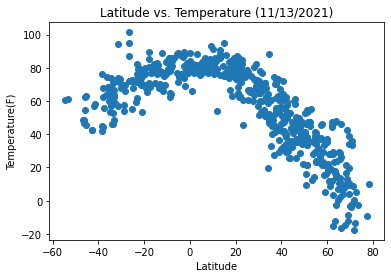

In [6]:
plt.scatter(weather_df['coord.lat'], weather_df['main.temp_max'])
plt.title('Latitude vs. Temperature (11/13/2021)')
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.savefig('LatitudeTemp.png')

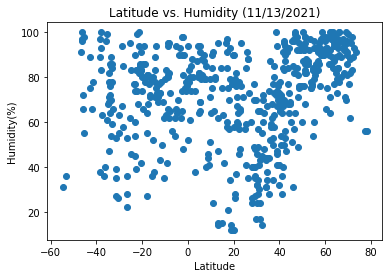

In [7]:
plt.scatter(weather_df['coord.lat'], weather_df['main.humidity'])
plt.title('Latitude vs. Humidity (11/13/2021)')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.savefig('LatitudeHumid.png')

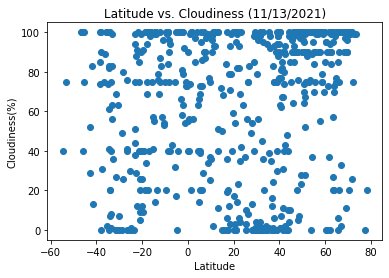

In [8]:
plt.scatter(weather_df['coord.lat'], weather_df['clouds.all'])
plt.title('Latitude vs. Cloudiness (11/13/2021)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.savefig('LatitudeClouds.png')

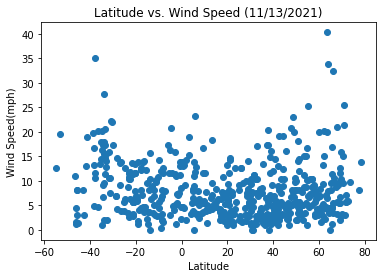

In [9]:
plt.scatter(weather_df['coord.lat'], weather_df['wind.speed'])
plt.title('Latitude vs. Wind Speed (11/13/2021)')
plt.ylabel('Wind Speed(mph)')
plt.xlabel('Latitude')
plt.savefig('LatitudeWind.png')

In [10]:
weather_df.dtypes

weather             object
base                object
visibility         float64
dt                 float64
timezone           float64
id                 float64
name                object
cod                 object
coord.lon          float64
coord.lat          float64
main.temp          float64
main.feels_like    float64
main.temp_min      float64
main.temp_max      float64
main.pressure      float64
main.humidity      float64
main.sea_level     float64
main.grnd_level    float64
wind.speed         float64
wind.deg           float64
wind.gust          float64
clouds.all         float64
sys.country         object
sys.sunrise        float64
sys.sunset         float64
sys.type           float64
sys.id             float64
snow.1h            float64
message             object
rain.1h            float64
dtype: object

In [11]:
northern_df = weather_df.loc[weather_df['coord.lat'] >= 0]
southern_df = weather_df.loc[weather_df['coord.lat'] < 0]

R-Squared = 0.7832984801520333


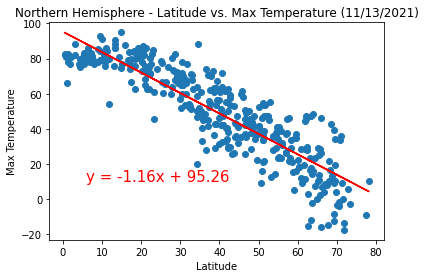

<Figure size 432x288 with 0 Axes>

In [12]:

x_values = northern_df['coord.lat']
y_values = northern_df['main.temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Latitude vs. Max Temperature (11/13/2021)')
plt.ylabel('Max Temperature')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('NorthLatTemp.png')

R-Squared = 0.4672657765844802


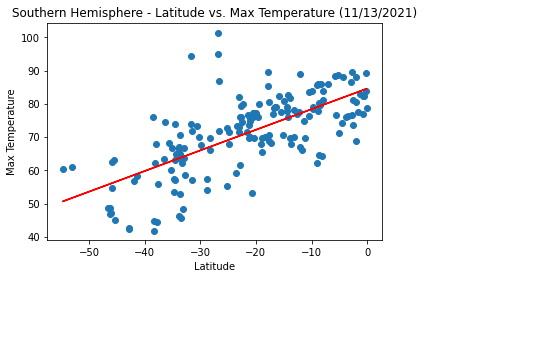

<Figure size 432x288 with 0 Axes>

In [13]:

x_values = southern_df['coord.lat']
y_values = southern_df['main.temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Latitude vs. Max Temperature (11/13/2021)')
plt.ylabel('Max Temperature')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('SouthLatTemp.png')

R-Squared = 0.1490754511889584


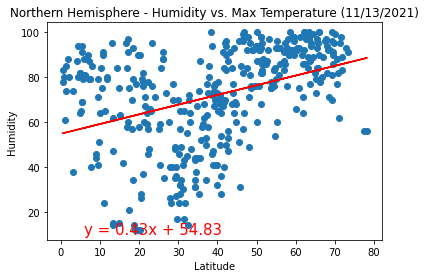

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = northern_df['coord.lat']
y_values = northern_df['main.humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity vs. Max Temperature (11/13/2021)')
plt.ylabel('Humidity')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('NorthLatHumidity.png')

R-Squared = 0.005830836112538082


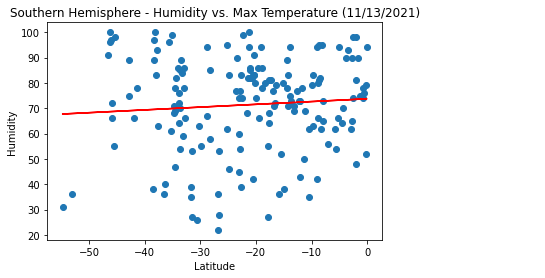

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = southern_df['coord.lat']
y_values = southern_df['main.humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Humidity vs. Max Temperature (11/13/2021)')
plt.ylabel('Humidity')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('SouthLatHumidity.png')

R-Squared = 0.04492124029851049


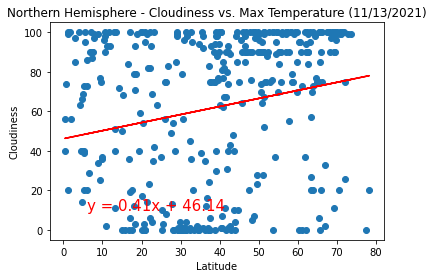

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_df['coord.lat']
y_values = northern_df['clouds.all']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness vs. Max Temperature (11/13/2021)')
plt.ylabel('Cloudiness')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('NorthLatCloud.png')

R-Squared = 0.02154408416886801


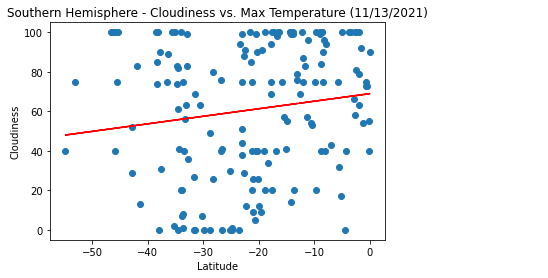

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_df['coord.lat']
y_values = southern_df['clouds.all']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness vs. Max Temperature (11/13/2021)')
plt.ylabel('Cloudiness')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('SouthLatCloud.png')

R-Squared = 0.018085072349343


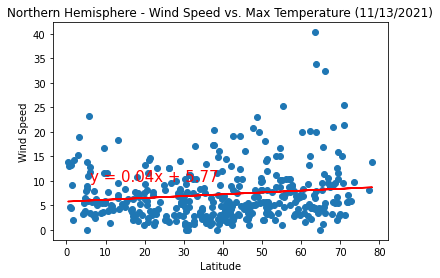

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_df['coord.lat']
y_values = northern_df['wind.speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed vs. Max Temperature (11/13/2021)')
plt.ylabel('Wind Speed')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('NorthLatWind.png')

R-Squared = 0.06339281078723598


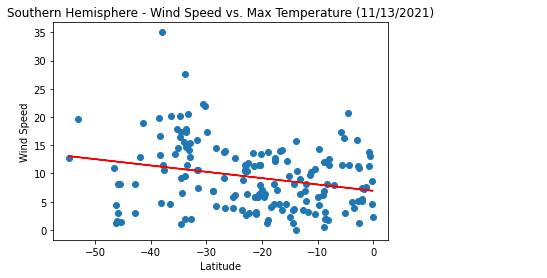

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_df['coord.lat']
y_values = southern_df['wind.speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed vs. Max Temperature (11/13/2021)')
plt.ylabel('Wind Speed')
print(f'R-Squared = {rvalue**2}')
plt.show()
plt.savefig('SouthLatWind.png')

# Conclusions

1. It is clear there is a strong correlation between max temperature and latitude in the northern hemisphere. As latitude goes up, temperature tends to go down. The opposite is true in the Southern hemisphere. There as latitude goes up, temperature goes up. This is true because as latitude goes up in in the Northern hemisphere, it moves further from the equator. In contrast as latitude goes up in the Souther hemisphere, it moves closer to the equator.
2. There appears to be no signfiicant correlation between latitude and Humidity, Cloudiness, or Wind Speed. This indicates that other factors such as proximity to bodies of water or mountains are likely more significant factors in explaining these variables
3. Interestingly, the r-squared value for southern hemisphere max temp is much lower than the northern hemisphere max temp r-squared value. This may be due to the fact that it is currently summer in the southern hemisphere although more research would be required.